# Diamond price prediction

In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Dataset Description
    Price is in US dollars
    Carat weight of the diamond
    Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    color diamond colour, from J (worst) to D (best)
    clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    x length in mm
    y width in mm
    z depth in mm
    depth: The height of a diamond
    table: The width of the diamond’s table expressed as a percentage of its average diameter

In [2]:
df = pd.read_csv("C:/Users/User/Msc Codes/DataStics/Data/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
del df['Unnamed: 0']

In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
df.shape

(53940, 10)

In [6]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [7]:
df[df["x"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [8]:
df[df["y"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [9]:
df[df["z"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z


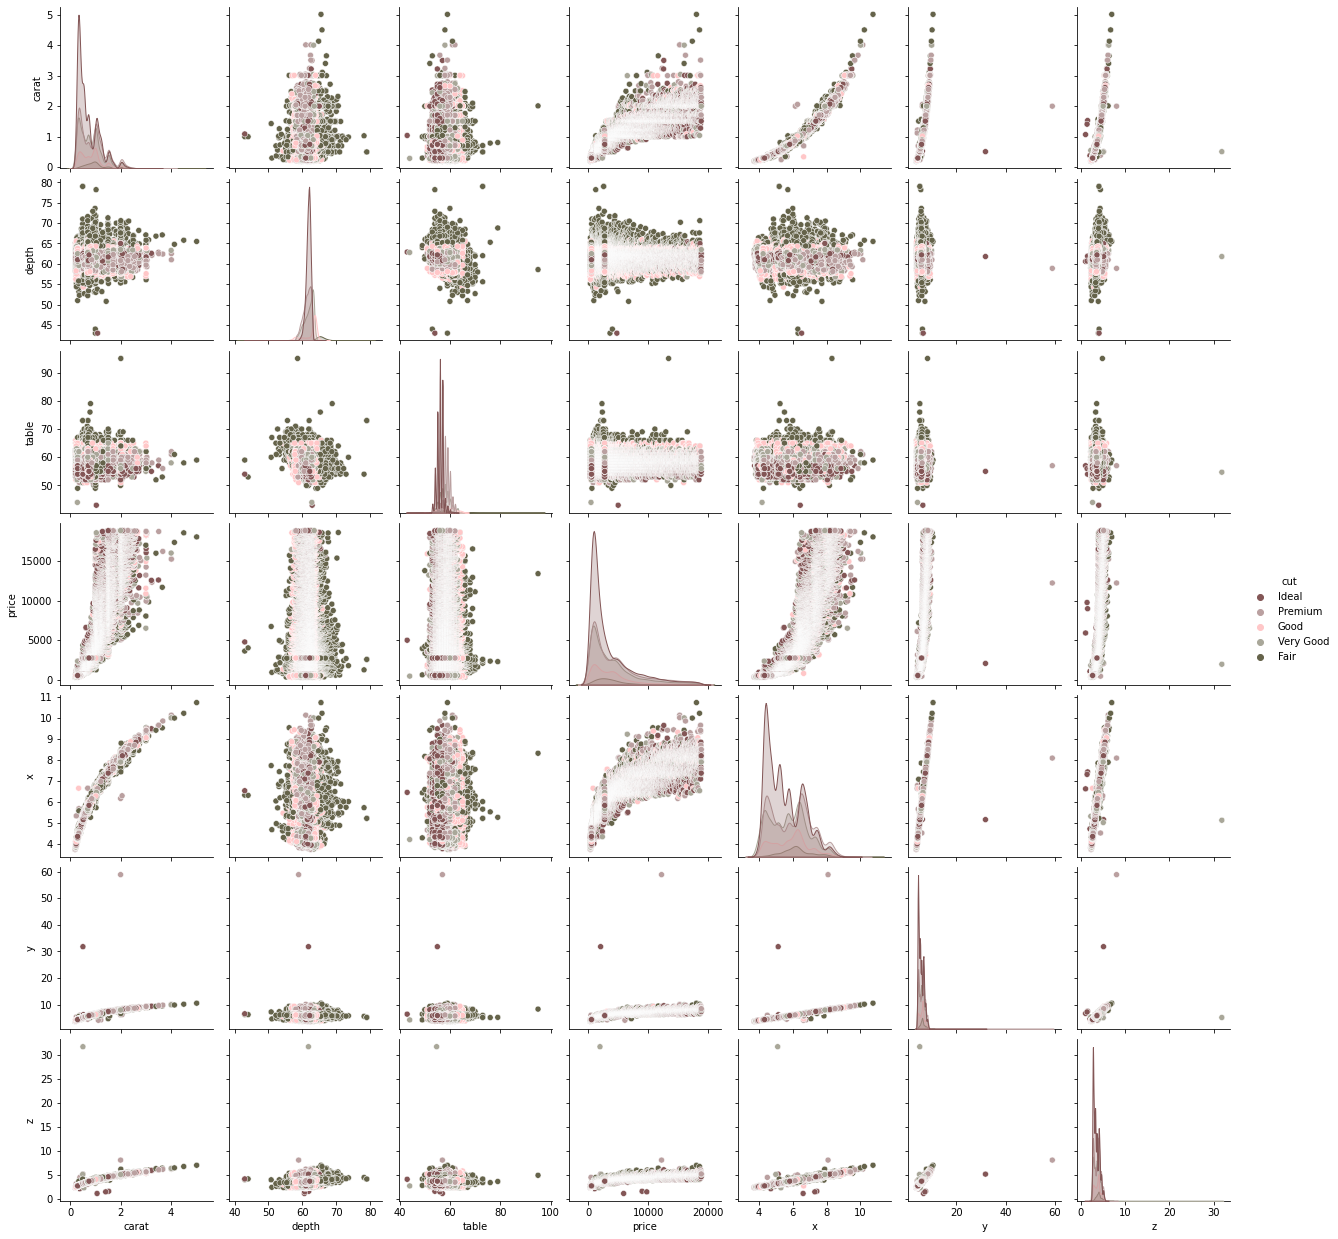

In [10]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df, hue= "cut",palette=shade)

In [11]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
    le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col ,le_name_mapping)

cut {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
color {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
clarity {'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}


In [13]:
label_data = label_data[['carat','cut','color','clarity','depth','table','x','y','z','price']]  

<AxesSubplot:>

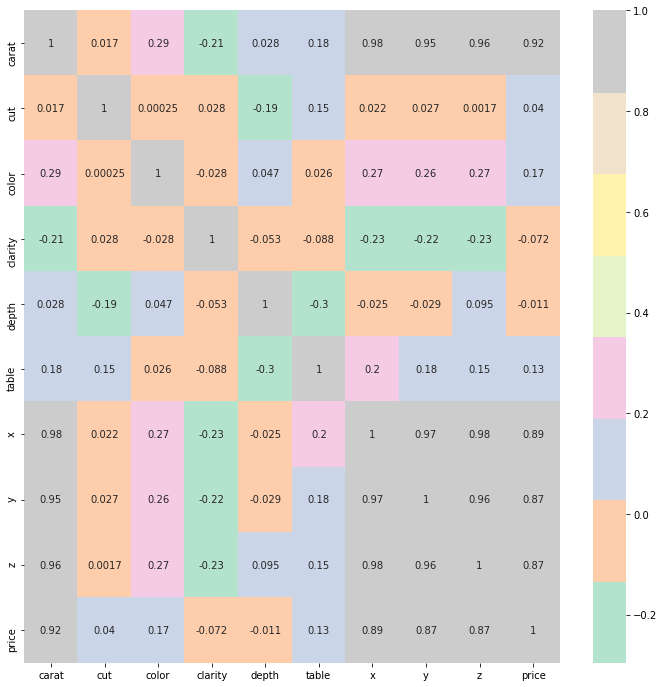

In [14]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

In [15]:
label_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335


In [16]:
label_data.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,2,0,3,62.2,55.0,5.83,5.87,3.64,2757


In [17]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [18]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [19]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [20]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Training set:  0.883303081267148
Accuracy on Testing set:  0.8879880756654874
		Error Table
Mean Absolute Error      :  848.4154154506222
Mean Squared  Error      :  1762425.2536699763
Root Mean Squared  Error :  1327.5636533401992
R Squared Error          :  0.8879880756654874


In [23]:
# XGBRegressor
import xgboost as xgb
xgbreg = xgb.XGBRegressor()
xgbreg.fit(X_train, y_train)
y_pred= xgbreg.predict(X_test)
print("Accuracy on Traing set: ",xgbreg.score(X_train,y_train))
print("Accuracy on Testing set: ",xgbreg.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.9912643666966373
Accuracy on Testing set:  0.9815880596019108
		Error Table
Mean Absolute Error      :  276.81620550183936
Mean Squared  Error      :  289698.34166718944
Root Mean Squared  Error :  538.2363251093235
R Squared Error          :  0.9815880596019108


In [24]:
df1 = np.array([[0.23, 2, 1, 3, 61.5, 55.0, 3.95, 3.98, 2.43]])
prediction = xgbreg.predict(df1)
print(prediction)

[297.73425]


In [25]:
import pickle
DT_pkl_filename = 'models/Diamond-XGBRegressor.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(xgbreg, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [26]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)
print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train))
print("Accuracy on Testing set: ",reg_rf.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.9973104382066811
Accuracy on Testing set:  0.9826413400051056
		Error Table
Mean Absolute Error      :  265.1250389518864
Mean Squared  Error      :  273125.74912567943
Root Mean Squared  Error :  522.6143407195017
R Squared Error          :  0.9826413400051056


In [27]:
df1 = np.array([[0.23, 2, 1, 3, 61.5, 55.0, 3.95, 3.98, 2.43]])
prediction = reg_rf.predict(df1)
print(prediction)

[394.26]


In [28]:
df1 = np.array([[0.75, 2, 0, 3, 62.2, 55.0, 5.83, 5.87, 3.64]])
prediction = reg_rf.predict(df1)
print(prediction)

[2764.12]
